<a href="https://colab.research.google.com/github/thornish/Python_Project3/blob/main/Python_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Load and study the data in order to prioritize the columns I need for the analysis
2.	Clean the accordingly – Rename cols/ Drop cols/ Select cols/ replace missing data etc.
3.	Visualizations: 
•	Arrest date VS no of arrests (any pattern due to holidays or occasions)
•	Arrest borough VS no of arrests
•	Age / Sex / Race
•	Arrest precinct- Higher and lower arrest rates
•	Level of misdemeanor(Law_cat_cd) VS Count 


In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date.csv to NYPD_Arrest_Data__Year_to_Date (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

import io
 
df = pd.read_csv(io.BytesIO(uploaded['NYPD_Arrest_Data__Year_to_Date.csv']))
print(df)

In [ ]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
#Dropping the columns that i Think i won't be needing forn this analysis
df1 = df.drop(df.columns[[14,15, 16, 17, 18]], axis=1)


In [ ]:
#Replacing missing values with 0
df1= df1.replace(np.NaN, 'UNK')

In [ ]:
df1.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Arrest_month
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,2021-12-18
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,2021-11-25
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,2021-10-14
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,2021-10-11
4,234188790,9/28/2021,578.0,UNK,UNK,UNK,PL 2223001,M,B,44,0,25-44,M,BLACK,2021-09-28


In [ ]:
#Checking to see if there are any null values
df1.isnull().sum()

In [ ]:
#Creating a New column 'Arrested month'  form an existing oclumn 'Arrest_Date' in order to have months which will be easier for analysis 
df1['Arrest_month'] = pd.to_datetime(df['ARREST_DATE'])
df1['ARRESTED_MONTH'] = df1['Arrest_month'].dt.month_name()


In [ ]:
df1.head(10)

In [ ]:
df1.groupby(['AGE_GROUP','PERP_SEX','PERP_RACE','ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending= False)
#Age group 25-44, Males from Race Black and White Hispanic have higher rates of arrest in Boroughs K,M,B and Q

AGE_GROUP  PERP_SEX  PERP_RACE                       ARREST_BORO
25-44      M         BLACK                           K              11159
                                                     M               8935
                                                     B               7544
                                                     Q               5931
                     WHITE HISPANIC                  Q               4950
                                                                    ...  
<18        M         AMERICAN INDIAN/ALASKAN NATIVE  K                  1
65+        M         AMERICAN INDIAN/ALASKAN NATIVE  B                  1
                     BLACK HISPANIC                  S                  1
<18        F         AMERICAN INDIAN/ALASKAN NATIVE  K                  1
45-64      M         UNKNOWN                         S                  1
Name: ARREST_KEY, Length: 320, dtype: int64

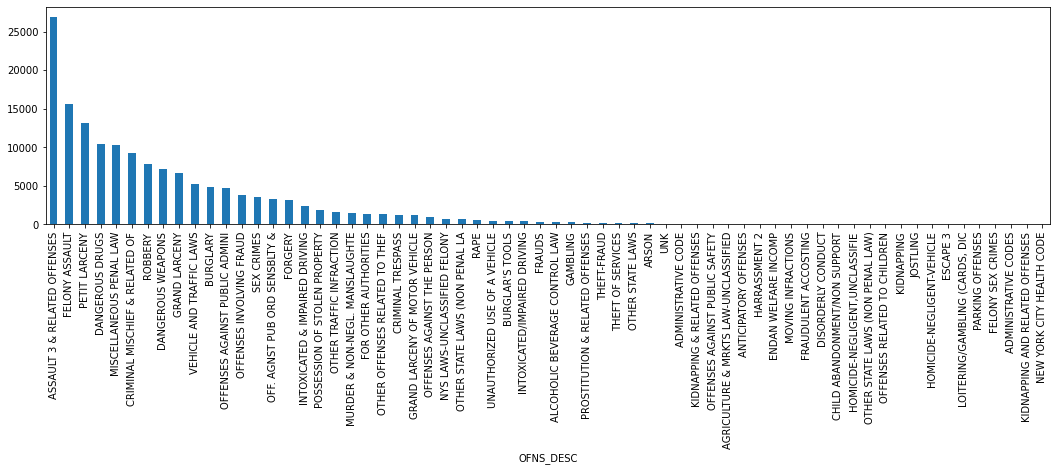

In [ ]:
plot.figure(figsize= (18,4))
df1.groupby(['OFNS_DESC'])['OFNS_DESC'].count().sort_values(ascending= False).plot(kind ="bar")
#Assault 3 and Related Offenses have the highest count

The 3 plots below define the Highest and lowest counts of Perp Race,  Perp sex and Age group by the Level of offense 

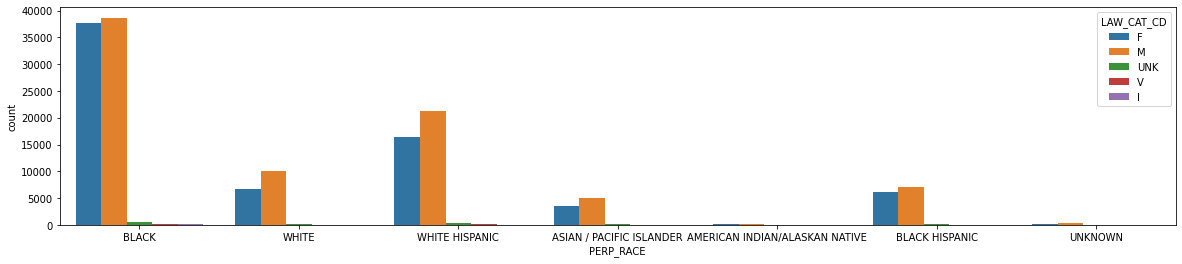

In [ ]:
plot.figure(figsize= (20,4))
sns.countplot(x="PERP_RACE", hue = "LAW_CAT_CD", data=df1)

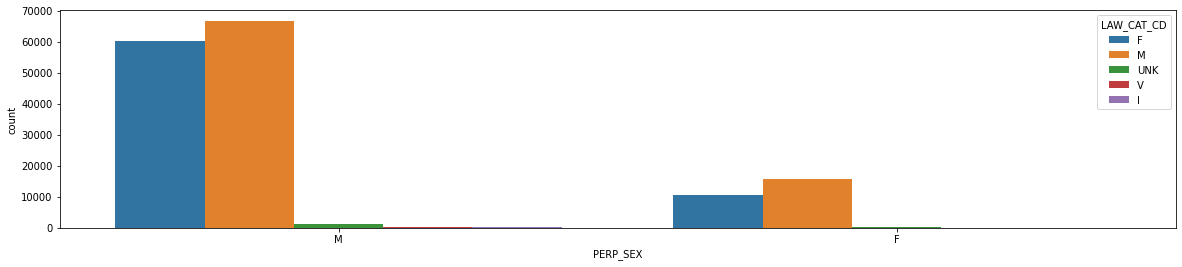

In [ ]:
plot.figure(figsize= (20,4))
sns.countplot(x="PERP_SEX", hue = "LAW_CAT_CD", data=df1)
#MAles have higher count of arrests

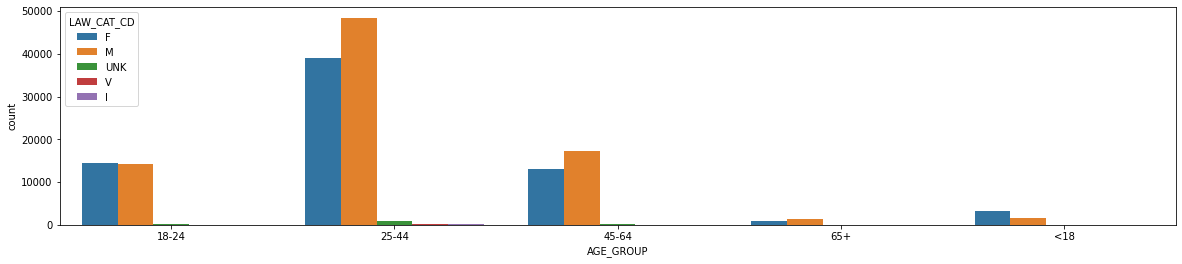

In [ ]:
plot.figure(figsize= (20,4))
sns.countplot(x="AGE_GROUP", hue = "LAW_CAT_CD", data=df1)
#Age group 25-44 have the highest number of arrests

In [ ]:
df1.groupby(['AGE_GROUP','PERP_SEX','PERP_RACE','ARREST_BORO'])['ARREST_BORO'].count().sort_values(ascending= False)
#Age group 25-44, Males from Race Black and White Hispanic have higher rates of arrest in Boroughs K,M,B and Q

AGE_GROUP  PERP_SEX  PERP_RACE                       ARREST_BORO
25-44      M         BLACK                           K              11159
                                                     M               8935
                                                     B               7544
                                                     Q               5931
                     WHITE HISPANIC                  Q               4950
                                                                    ...  
<18        M         AMERICAN INDIAN/ALASKAN NATIVE  K                  1
65+        M         AMERICAN INDIAN/ALASKAN NATIVE  B                  1
                     BLACK HISPANIC                  S                  1
<18        F         AMERICAN INDIAN/ALASKAN NATIVE  K                  1
45-64      M         UNKNOWN                         S                  1
Name: ARREST_BORO, Length: 320, dtype: int64

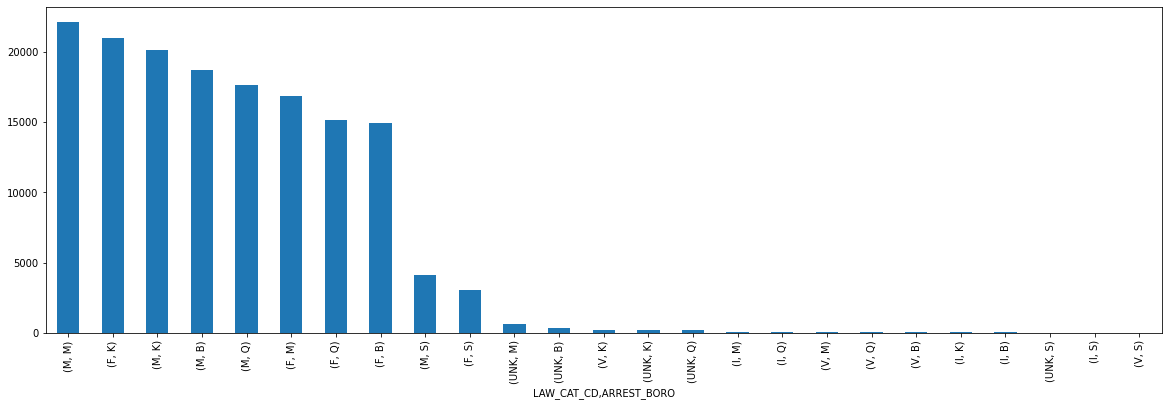

In [ ]:
plot.figure(figsize= (20,6))
df1.groupby(['LAW_CAT_CD','ARREST_BORO'])['ARREST_BORO'].count().sort_values(ascending= False).plot(kind="bar")
#Boroughs M and K have the highest offenses of Misdemeanors and Felonies

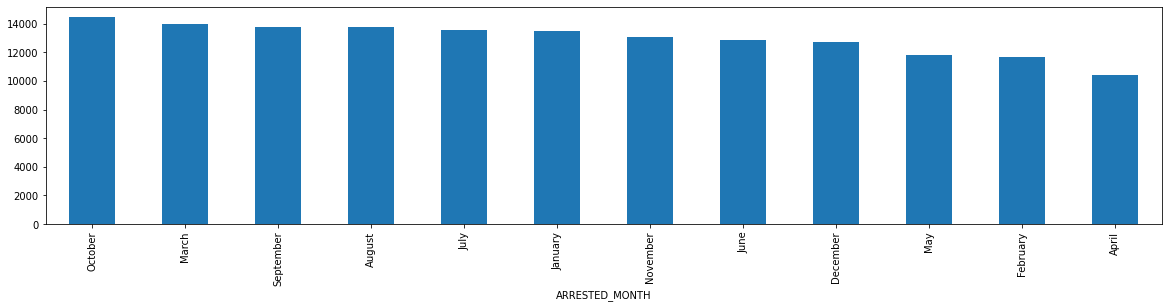

In [ ]:
plot.figure(figsize= (20,4))
df1.groupby(['ARRESTED_MONTH'])['ARREST_BORO'].count().sort_values(ascending= False).plot(kind="bar")
#Month of October has highest number of arrests

In [ ]:
#General statistics by Offenses and Level of demeaners 
df1.groupby(['OFNS_DESC','LAW_CAT_CD']).count()

ARREST_KEY  ARREST_DATE  \
OFNS_DESC                            LAW_CAT_CD                            
ADMINISTRATIVE CODE                  I                    8            8   
                                     M                   26           26   
                                     V                   52           52   
ADMINISTRATIVE CODES                 V                    2            2   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED M                   72           72   
...                                                     ...          ...   
UNK                                  F                   46           46   
                                     M                   57           57   
VEHICLE AND TRAFFIC LAWS             F                  183          183   
                                     I                    2            2   
                                     M                 5079         5079   

                                                 PD_CD  PD_DESC  KY_CD  \
OFNS_DESC                            LAW_CAT_CD                          
ADMINISTRATIVE CODE                  I               8        8      8   
                                     M              26       26     26   
                                     V              52       52     52   
ADMINISTRATIVE CODES                 V               2        2      2   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED M              72       72     72   
...                                                ...      ...    ...   
UNK                                  F              46       46     46   
                                     M              57       57     57   
VEHICLE AND TRAFFIC LAWS             F             183      183    183   
                                     I               2        2      2   
                                     M            5079     5079   5079   

                                                 LAW_CODE  ARREST_BORO  \
OFNS_DESC                            LAW_CAT_CD                          
ADMINISTRATIVE CODE                  I                  8            8   
                                     M                 26           26   
                                     V                 52           52   
ADMINISTRATIVE CODES                 V                  2            2   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED M                 72           72   
...                                                   ...          ...   
UNK                                  F                 46           46   
                                     M                 57           57   
VEHICLE AND TRAFFIC LAWS             F                183          183   
                                     I                  2            2   
                                     M               5079         5079   

                                                 ARREST_PRECINCT  \
OFNS_DESC                            LAW_CAT_CD                    
ADMINISTRATIVE CODE                  I                         8   
                                     M                        26   
                                     V                        52   
ADMINISTRATIVE CODES                 V                         2   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED M                        72   
...                                                          ...   
UNK                                  F                        46   
                                     M                        57   
VEHICLE AND TRAFFIC LAWS             F                       183   
                                     I                         2   
                                     M                      5079   

                                                 JURISDICTION_CODE  AGE_GROUP  \
OFNS_DESC                            LAW_CAT_CD                                 
ADMINISTRATIVE CODE                  I                           8          8   
      

The above analysis has been performed by excluding the columns that define location i.e., 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'. 
After loading the data and studying it i realised that a column for Months for arrests would be easier for analysis.Newly created column 'Arrested_months' gives thiis information. Upon review Black and White hispanic Males of age group [24-44] had the highest number of misdemeanors and felonies in the boroughs